In [1]:
import numpy as np
import gym
import gym_fourrooms
import pandas as pd
from PIL import Image

In [2]:
env = gym.make("SubGoalFourrooms-v0")

In [2]:
def load_subgoals(file_path, task_id=None):
    subgoal_df = pd.read_csv(file_path)
    if task_id is not None:
        subgoal_df = subgoal_df[subgoal_df["task_id"] == task_id]
    subg_serieses_df = subgoal_df.groupby(["user_id", "task_id"]).agg(list)
    subg_serieses = []
    for subg_series in list(subg_serieses_df['state'].values):
        subg_serieses.append([subg_series])
    return subg_serieses

In [4]:
def output_env_render(env, subgoal_sets):
    pil_images = []

    for l_subgoal in subgoal_sets:
        subgoal_dict = {}
        for i, subgoal in enumerate(l_subgoal[0]):
            subgoal_dict[subgoal] = i
        
        env.reset(subgoals=subgoal_dict)
        img = env.render(mode='rgb_array')
        pil_images.append(Image.fromarray(img))
    
    return pil_images

# 参加者サブゴールの可視化

In [4]:
fpath = "../in/subgoals/fourrooms_human_subgoals.csv"
subgoal_sets = load_subgoals(fpath)
subgoal_sets

[[[38, 101]],
 [[51, 88]],
 [[27, 80]],
 [[28, 101]],
 [[42, 87]],
 [[51, 88]],
 [[25, 62]],
 [[51, 88]],
 [[51, 88]],
 [[25, 62]]]

In [ ]:
pil_images = output_env_render(env, subgoal_sets)

In [6]:
# 画像の保存
for i, pil_image in enumerate(pil_images):
    pil_image.save(f"../img/P{i}.pdf", format="pdf", quality=100)

# Number of Subgoals

In [7]:
import glob
import os
n_subg_dir = "../in/subgoals/fourrooms/"

subg_files = glob.glob(os.path.join(n_subg_dir, "*"))
pil_images = []
names = []

for subg_file in subg_files:
    sub_series = load_subgoals(subg_file)
    pil_images += output_env_render(env, sub_series)
    fname = os.path.basename(subg_file)
    names.append(os.path.splitext(fname)[0])

In [8]:
output_dir = "../img/n_subgs"
assert len(pil_images) == len(names)

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for pil_image, name in zip(pil_images, names):
    pil_image.save(os.path.join(output_dir, name + ".pdf"), format="pdf", quality=100)

# Partially Ordered Subgoals

In [9]:
def load_partially_subgoals(file_path):
    subgoal_df = pd.read_csv(file_path)
    subgs = subgoal_df.groupby("user_id").agg(list).values.tolist()
    all_subg_tuples = []

    for prev_subgs, next_subgs in subgs:
        subg_tuples = [(prev_sg, next_sg) for prev_sg, next_sg in zip(prev_subgs, next_subgs)]
        all_subg_tuples.append(subg_tuples)
    
    return all_subg_tuples


In [10]:
fpath = "../in/subgoals/4room_min_partially_subgoals.csv"
subgoal_sets = load_partially_subgoals(fpath)
subgoal_sets

[[(25, 62), (51, 88)]]

In [11]:
subgoal_series = []
for subgoal_tuples in subgoal_sets:
    subgoals = set()
    for pre_sub, next_sub in subgoal_tuples:
        subgoals.add(pre_sub)
        subgoals.add(next_sub)

    subgoal_series.append(list(subgoals))

pil_images = output_env_render(env, [subgoal_series])

In [12]:
output_dir = "../img/partially"
names = ["partially_ordered_subgoal"]
assert len(pil_images) == len(names)

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for pil_image, name in zip(pil_images, names):
    pil_image.save(os.path.join(output_dir, name + ".pdf"), format="pdf", quality=100)

# Mixed Positive and Negative Rewards

In [10]:
env = gym.make('PenalizedTworooms-v0')

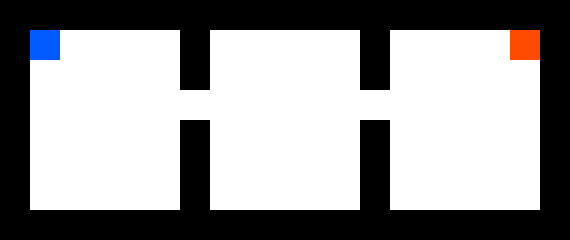

In [12]:
env.reset()
img_arr = env.render(mode="rgb_array")
img = Image.fromarray(img_arr)
img.save("../img/three_room.png", format="png", quality=100)
img

In [13]:
subgoal_sets = [[[35, 41]]]
pil_images = output_env_render(env, subgoal_sets)
pil_images[0].save("../img/three_room_with_subgs.pdf", format="pdf", quality=100)